(150, 4)


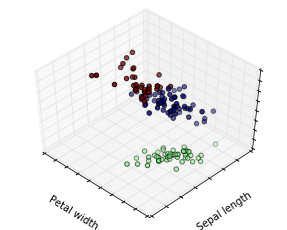

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
78.9408414261
[2]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

# Prepare dataset
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
print X.shape

# Run KMeans clustering algorithm.
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_

# Draw label and data.
fignum=1
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

# Print metrics and run prediction.
print model.cluster_centers_
print model.inertia_
print model.predict(np.array([8, 8, 8, 2]).reshape(1, -1))

(1500, 2)


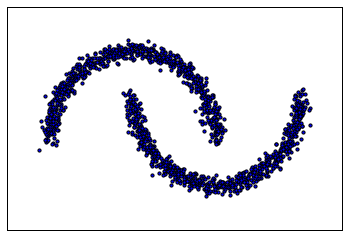

In [2]:
from sklearn import metrics

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
moons = datasets.make_moons(n_samples=1500, noise=0.05)
X, y = moons
print X.shape

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xticks(())
plt.yticks(())
plt.show()

## K-Means 分群演算法

![title](img/kmeans.png)

圖片來源: http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

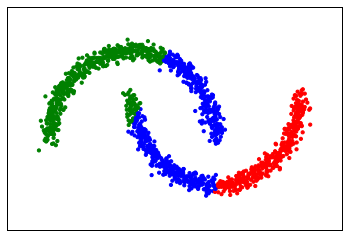

[[ 0.59510877  0.11997021]
 [-0.41544032  0.66958595]
 [ 1.64220688 -0.13252992]]
404.082520533
Homogeneity: 0.434
Completeness: 0.278
V-measure: 0.339
Adjusted Rand Index: 0.280
Adjusted Mutual Information: 0.278
Silhouette Coefficient: 0.429


In [3]:
model = KMeans(n_clusters=3, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
#         The final results will be the best output of n_init consecutive runs in terms of inertia.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.
# algorithm: The classical EM-style algorithm is “full”. 
#            The “elkan” variation is more efficient by using the triangle inequality, 
#            but currently doesn’t support sparse data. 
#           “auto” chooses “elkan” for dense data and “full” for sparse data.
# tol: Relative tolerance with regards to inertia to declare convergence
model.fit(X)
labels = model.labels_

plt.scatter(X[:, 0], X[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.cluster_centers_

# inertia_: sum of distances of samples to their closest cluster center.
# homogeneity: each cluster contains only members of a single class.
# completeness: all members of a given class are assigned to the same cluster.
print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

## DBSCAN 分群演算法

![title](img/dbscan.png)


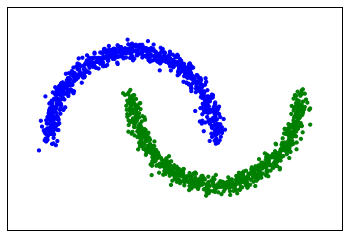

[[-0.99046891  0.36157298]
 [ 0.22409844 -0.13243265]
 [ 0.10749489  0.21398944]
 ..., 
 [ 0.45755567 -0.35817629]
 [ 0.67646982  0.76836186]
 [ 0.15049131 -0.0067354 ]]
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.335


In [4]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.2, min_samples=15)
# eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
#              This includes the point itself
model.fit(X)
labels = model.labels_

plt.scatter(X[:, 0], X[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.components_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

## 玩玩看其他的資料吧！

In [5]:
from IPython.display import display

# The KDD Cup ‘99 dataset was created by processing the tcpdump portions of the 1998 
# DARPA Intrusion Detection System (IDS) Evaluation dataset, created by MIT Lincoln Lab [1] . 
# The artificial data was generated using a closed network and hand-injected attacks 
# to produce a large number of different types of attack with normal activity in the background. 
# As the initial goal was to produce a large training set for supervised learning algorithms, 
# there is a large proportion (80.1%) of abnormal data which is unrealistic in real world, 
# and inappropriate for unsupervised anomaly detection which aims at detecting ‘abnormal’ data, 
# ie 1. qualitatively different from normal data. 2. in large minority among the observations.
kddcup99 = datasets.fetch_kddcup99(percent10=True)
X = kddcup99.data
y = kddcup99.target
display(pd.Series(y).value_counts().to_frame('count'))

,count
smurf.,280790
neptune.,107201
normal.,97278
back.,2203
satan.,1589
ipsweep.,1247
portsweep.,1040
warezclient.,1020
teardrop.,979
pod.,264


In [6]:
# Please refers the url for feature description 
# http://kdd.ics.uci.edu/databases/kddcup99/task.html
dt = [
    ('duration', int),
    ('protocol_type', 'S4'),
    ('service', 'S11'),
    ('flag', 'S6'),
    ('src_bytes', int),
    ('dst_bytes', int),
    ('land', int),
    ('wrong_fragment', int),
    ('urgent', int),
    ('hot', int),
    ('num_failed_logins', int),
    ('logged_in', int),
    ('num_compromised', int),
    ('root_shell', int),
    ('su_attempted', int),
    ('num_root', int),
    ('num_file_creations', int),
    ('num_shells', int),
    ('num_access_files', int),
    ('num_outbound_cmds', int),
    ('is_host_login', int),
    ('is_guest_login', int),
    ('count', int),
    ('srv_count', int),
    ('serror_rate', float),
    ('srv_serror_rate', float),
    ('rerror_rate', float),
    ('srv_rerror_rate', float),
    ('same_srv_rate', float),
    ('diff_srv_rate', float),
    ('srv_diff_host_rate', float),
    ('dst_host_count', int),
    ('dst_host_srv_count', int),
    ('dst_host_same_srv_rate', float),
    ('dst_host_diff_srv_rate', float),
    ('dst_host_same_src_port_rate', float),
    ('dst_host_srv_diff_host_rate', float),
    ('dst_host_serror_rate', float),
    ('dst_host_srv_serror_rate', float),
    ('dst_host_rerror_rate', float),
    ('dst_host_srv_rerror_rate', float),
    ('labels', 'S16')
]

headers = [r[0] for r in dt]
df_X = pd.DataFrame(X, columns=headers[:-1])
df_y = pd.DataFrame(y, columns=['labels'])
df_Xy = pd.concat([df_X, df_y], axis=1)
df1_Xy = df_Xy[~df_Xy['labels'].isin(['smurf.', 'normal.', 'neptune.'])]
print df_Xy.shape
print df1_Xy.shape

X1 = df1_Xy[headers[:-1]].values
X1 = X1[:,np.r_[0:1,4:41]]
y1 = df1_Xy[headers[-1]].values
n_clusters = len(np.unique(y1))

model = KMeans(n_clusters=n_clusters)
model.fit(X1)
labels1 = model.labels_

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y1, labels1))
print("Completeness: %0.3f" % metrics.completeness_score(y1, labels1))

(494021, 42)
(8752, 42)
4105753961.32
Homogeneity: 0.348
Completeness: 0.782


In [7]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X1 = X1.astype(np.float64)
X2 = min_max_scaler.fit_transform(X1)
y2 = y1
n_clusters = len(np.unique(y2))

model = KMeans(n_clusters=n_clusters)
model.fit(X2)
labels2 = model.labels_

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y2, labels2))
print("Completeness: %0.3f" % metrics.completeness_score(y2, labels2))

1558.16557469
Homogeneity: 0.876
Completeness: 0.657


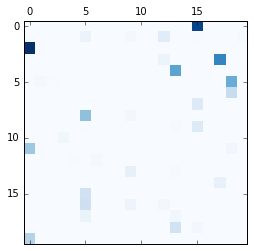

In [8]:
df_r2 = pd.DataFrame({'y': y2, 'label': labels2})
df_cb2 = df_r2.groupby(['label','y']).size().unstack(fill_value=0)
plt.matshow(df_cb2, cmap=plt.cm.Blues)
plt.show()

In [9]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

print 'number of targets :', len(np.unique(y2))

clf = GridSearchCV(MiniBatchKMeans(),
    {
        'n_clusters':[5, 10, 15, 20, 25, 30],
        'tol': [1e-4, 1e-3, 1e-2, 1e-1]
    },
    scoring=make_scorer(metrics.completeness_score)
)
clf.fit(X2, y2)
print clf.cv_results_['params']
print clf.cv_results_['mean_train_score']

clf = GridSearchCV(MiniBatchKMeans(),
    {
        'n_clusters':[5, 10, 15, 20, 25, 30],
        'tol': [1e-4, 1e-3, 1e-2, 1e-1]
    },
    scoring=make_scorer(metrics.homogeneity_score)
)
clf.fit(X2, y2)
print clf.cv_results_['params']
print clf.cv_results_['mean_train_score']

number of targets : 20
({'tol': 0.0001, 'n_clusters': 5}, {'tol': 0.001, 'n_clusters': 5}, {'tol': 0.01, 'n_clusters': 5}, {'tol': 0.1, 'n_clusters': 5}, {'tol': 0.0001, 'n_clusters': 10}, {'tol': 0.001, 'n_clusters': 10}, {'tol': 0.01, 'n_clusters': 10}, {'tol': 0.1, 'n_clusters': 10}, {'tol': 0.0001, 'n_clusters': 15}, {'tol': 0.001, 'n_clusters': 15}, {'tol': 0.01, 'n_clusters': 15}, {'tol': 0.1, 'n_clusters': 15}, {'tol': 0.0001, 'n_clusters': 20}, {'tol': 0.001, 'n_clusters': 20}, {'tol': 0.01, 'n_clusters': 20}, {'tol': 0.1, 'n_clusters': 20}, {'tol': 0.0001, 'n_clusters': 25}, {'tol': 0.001, 'n_clusters': 25}, {'tol': 0.01, 'n_clusters': 25}, {'tol': 0.1, 'n_clusters': 25}, {'tol': 0.0001, 'n_clusters': 30}, {'tol': 0.001, 'n_clusters': 30}, {'tol': 0.01, 'n_clusters': 30}, {'tol': 0.1, 'n_clusters': 30})
[ 0.82197091  0.83054913  0.80535949  0.81300786  0.72612693  0.7215569
  0.71577955  0.7207157   0.70439877  0.66511957  0.67285698  0.66357475
  0.64470833  0.64564292  0.642